In [8]:
using Statistics
using NetCDF
using PyPlot
include("plotmap.jl");

fname="data/ERA5/total_precipitation/ERA5_total_precipitation_mon.year.nc"
ncinfo(fname) #information about the variables 
tp=ncread(fname, "tp"); #1950-2020
lon=ncread(fname, "lon");
lat=ncread(fname, "lat");
time=ncread(fname, "time");
tp2=tp[:,:,29:71]

fname="data/ERA5/evaporation/ERA5_evaporation_mon.year.nc"
ncinfo(fname) #information about the variables 
ev=ncread(fname, "e"); #1978-2020
lon=ncread(fname, "lon");
lat=ncread(fname, "lat");
time=ncread(fname, "time");



##### NetCDF File #####

/home/jupyter-clima4/data/ERA5/total_precipitation/ERA5_total_precipitation_mon.year.nc

##### Dimensions #####

Name                                                Length                    
--------------------------------------------------------------------------------
lat                                                 180                       
time                                                UNLIMITED (71 currently)  
bnds                                                2                         
lon                                                 360                       

##### Variables #####

Name                            Type            Dimensions                      
--------------------------------------------------------------------------------
lat                             DOUBLE          lat                             
time                            DOUBLE          time                            
tp                              FLOAT

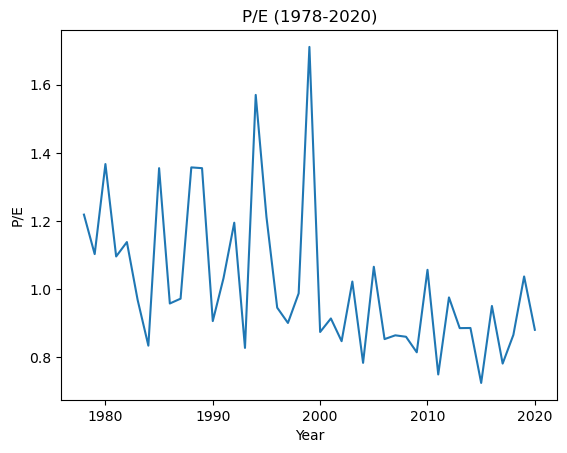

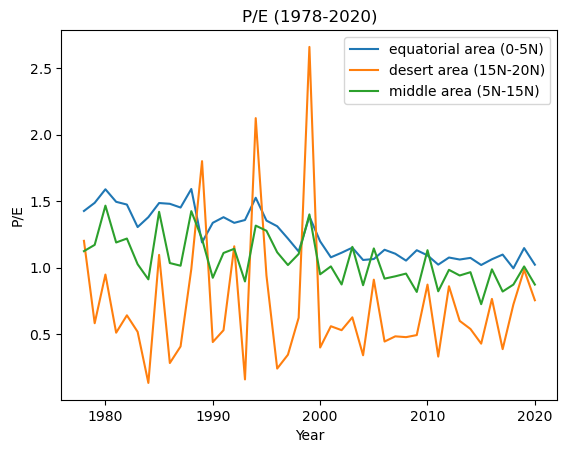

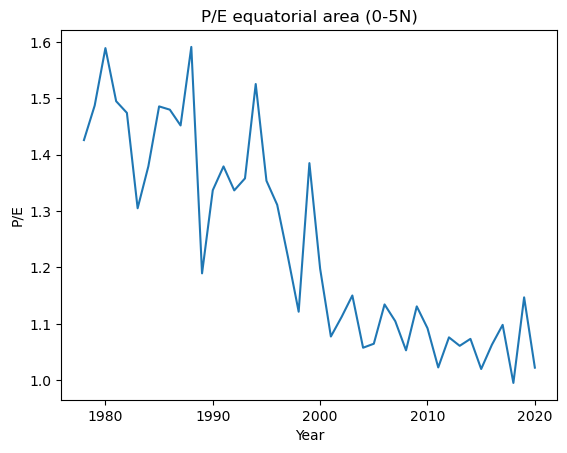

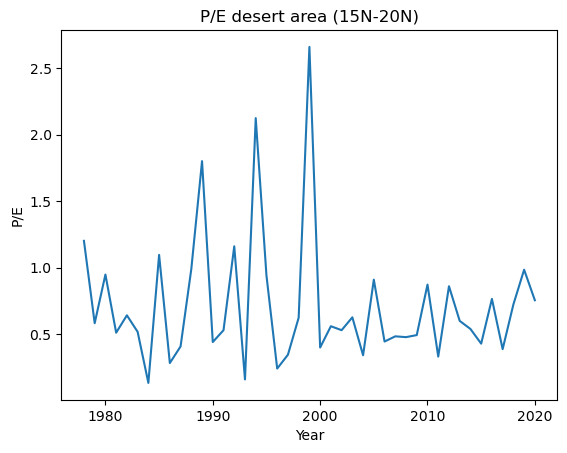

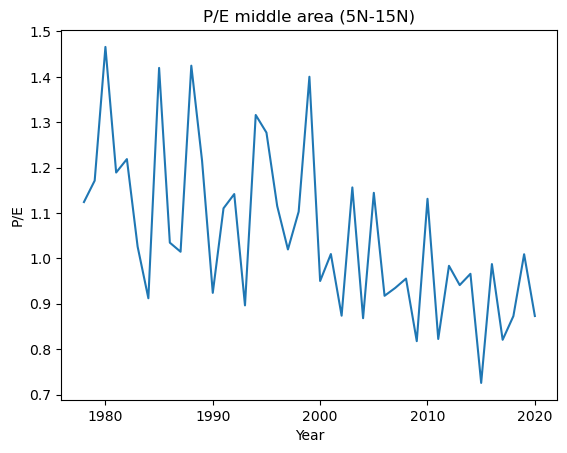

In [9]:

xrange = (lon.>=15) .& (lon.<=20);
yrange = (lat.>=0) .& (lat.<=20);
yrange_equatorial = (lat.>=0) .& (lat.<=5);
yrange_desert = (lat.>=15) .& (lat.<=20);
yrange_middle = (lat.>=5) .& (lat.<=15);


years = 1978:2020

ei_equatorial = tp2[xrange,yrange_equatorial,:]./abs.(ev[xrange,yrange_equatorial,:])
ei_means_desert = tp2[xrange,yrange_desert,:]./abs.(ev[xrange,yrange_desert,:])
ei_middle = tp2[xrange,yrange_middle,:]./abs.(ev[xrange,yrange_middle,:])

annual_means_equatorial = zeros(length(years))
annual_means_desert = zeros(length(years))
annual_means_middle = zeros(length(years))

for i in 1:length(years)
    y1 = ei_equatorial[:,:, i]
    annual_means_equatorial[i] = mean(y1)

    y2 = ei_means_desert[:,:, i]
    annual_means_desert[i] = mean(y2)

     y3 = ei_middle[:,:, i]
    annual_means_middle[i] = mean(y3)
end

ei=tp2[xrange,yrange,:]./abs.(ev[xrange,yrange,:]);#total

using PyPlot
annual_means1 = zeros(length(years))

for i in 1:length(years)
    y = ei[:, :, i]
    annual_means1[i] = mean(y)
end


figure()
plot(years, annual_means1)
xlabel("Year")
ylabel("P/E")
title("P/E (1978-2020)")
savefig("plot_image.png")

figure()
plot(years, annual_means_equatorial,years,annual_means_desert,years,annual_means_middle)

xlabel("Year")
ylabel("P/E")
title("P/E (1978-2020)")

legend(["equatorial area (0-5N)","desert area (15N-20N)","middle area (5N-15N)"])

means=(annual_means_equatorial,annual_means_desert,annual_means_middle);
titles=("P/E equatorial area (0-5N)","P/E desert area (15N-20N)","P/E middle area (5N-15N)");

for i in 1:3
    figure()
    plot(years,means[i])
    xlabel("Year")
    ylabel("P/E")
    title(titles[i])
end

    

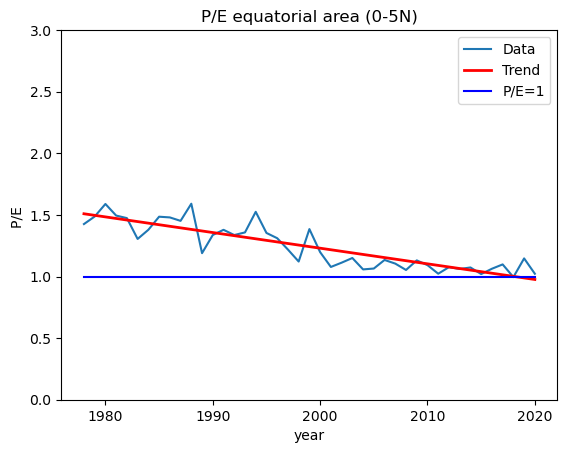

0.0

In [26]:
#TRENDS
using Polynomials #minimise the error 
years = 1978:2020
f=fit(years, annual_means_equatorial, 1) #the number before x is the variation per year of T
b=f[0]; a=f[1]; #parameters, a=SLOPE
trend=years*a .+ b;

plot(years, annual_means_equatorial)
plot(years, trend,color=:red,linewidth=2)
plot(years,1*ones(size(years)),color=:blue)
ylim(0, 3)
show()
xlabel("year"); ylabel("P/E ");
title("P/E equatorial area (0-5N)")
legend(["Data","Trend","P/E=1"])
using Random
x=years
y=annual_means_equatorial
using Polynomials, Random
function shufflingfit(x, y,a; n=1000)  
  s=zeros(n,1)
  for i=1:n
    f=fit(x,shuffle(y),1)
    s[i]=f[1]
  end
  count = sum(abs.(s).>abs.(a))
  return (count/n) #count/n=count percentage
end
(p) = shufflingfit(x,y,a, n=10000) #if p>0.05 the trend is not significant

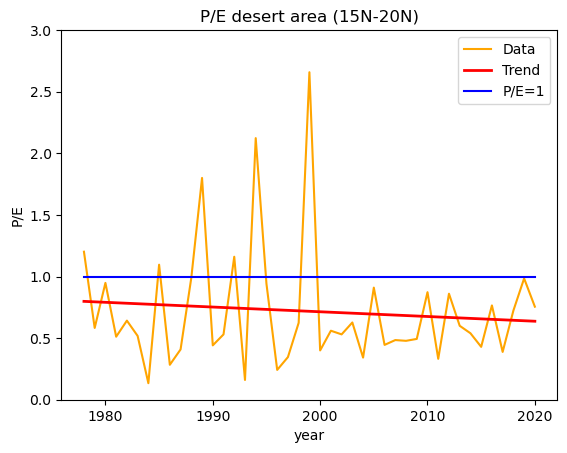

0.5498

In [27]:
using Polynomials #minimise the error 

f=fit(years, annual_means_desert, 1) #the number before x is the variation per year of T
b=f[0]; a=f[1]; #parameters, a=SLOPE
trend=years*a .+ b;

plot(years, annual_means_desert,color=:orange)
plot(years, trend,color=:red,linewidth=2)
plot(years,1*ones(size(years)),color=:blue)

ylim(0, 3)

xlabel("year"); ylabel("P/E");
title("P/E desert area (15N-20N)")
legend(["Data","Trend","P/E=1"])
y=annual_means_desert
(p) = shufflingfit(x,y,a, n=10000) #if p>0.05 the trend is not significant

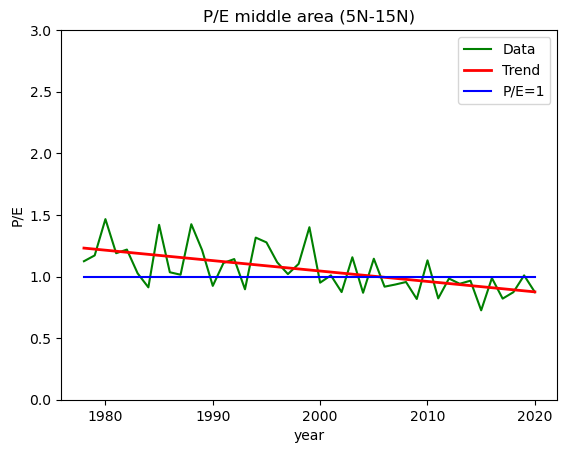

0.0

In [28]:
using Polynomials #minimise the error 

f=fit(years, annual_means_middle, 1) #the number before x is the variation per year of T
b=f[0]; a=f[1]; #parameters, a=SLOPE
trend=years*a .+ b;


plot(years, annual_means_middle,color=:green)
plot(years, trend,color=:red,linewidth=2)
plot(years,1*ones(size(years)),color=:blue)
ylim(0, 3)
xlabel("year"); ylabel("P/E");
title("P/E middle area (5N-15N)")
legend(["Data","Trend","P/E=1"])
y=annual_means_middle
(p) = shufflingfit(x,y,a, n=10000) #if p>0.05 the trend is not significant

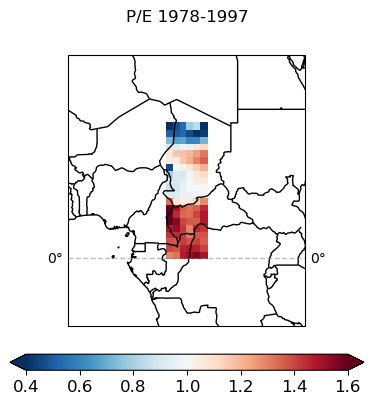

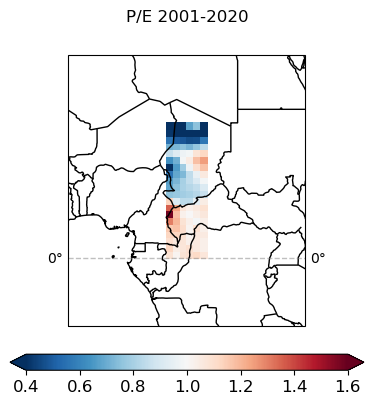

In [36]:
#map
EI = ei[:,:,1:19];
EImean=mean(EI,dims=3);

xrange = (lon.>=15) .& (lon.<=20);
yrange = (lat.>=0) .& (lat.<=20);
figure()
plotmap(lon[xrange], lat[yrange], EImean, 
        cstep=0.4:0.2:1.6, 
        titles="P/E 1978-1997", 
        tfs=12, region=(0, 35, -10,30),  borders=true)




EI2 = ei[:,:,43-19:43];
EI2mean=mean(EI2,dims=3);

xrange = (lon.>=15) .& (lon.<=20);
yrange = (lat.>=0) .& (lat.<=20);
figure()
plotmap(lon[xrange], lat[yrange], EI2mean, 
        cstep=0.4:0.2:1.6, 
        titles="P/E 2001-2020", 
        tfs=12, region=(0, 35, -10,30),  borders=true)


In [56]:
#correlations
vector1 = annual_means_desert
vector2 = annual_means_middle

vector1_1 = vector1[1:5]
vector1_2 = vector1[6:10]
vector1_3 = vector1[11:15]
vector1_4 = vector1[16:20]
vector1_5 = vector1[21:25]
vector1_6 = vector1[26:30]
vector1_7 = vector1[31:35]
vector1_8 = vector1[36:40]
vector1_9 = vector1[41:43]


vector1_1 = reshape(vector1_1, :, size(vector1_1, 2))
vector1_2 = reshape(vector1_2, :, size(vector1_2, 2))
vector1_3 = reshape(vector1_3, :, size(vector1_3, 2))
vector1_4 = reshape(vector1_4, :, size(vector1_4, 2)) 
vector1_5 = reshape(vector1_5, :, size(vector1_5, 2)) 
vector1_6 = reshape(vector1_6, :, size(vector1_6, 2))
vector1_7 = reshape(vector1_7, :, size(vector1_7, 2)) 
vector1_8 = reshape(vector1_8, :, size(vector1_8, 2))
vector1_9 = reshape(vector1_9, :, size(vector1_9, 2))

vector2_1 = vector2[1:5]
vector2_2 = vector2[6:10]
vector2_3 = vector2[11:15]
vector2_4 = vector2[16:20]
vector2_5 = vector2[21:25]
vector2_6 = vector2[26:30]
vector2_7 = vector2[31:35]
vector2_8 = vector2[36:40]
vector2_9 = vector2[41:43]


vector2_1 = reshape(vector2_1, :, size(vector2_1, 2))
vector2_2 = reshape(vector2_2, :, size(vector2_2, 2))
vector2_3 = reshape(vector2_3, :, size(vector2_3, 2))
vector2_4 = reshape(vector2_4, :, size(vector2_4, 2)) 
vector2_5 = reshape(vector2_5, :, size(vector2_5, 2)) 
vector2_6 = reshape(vector2_6, :, size(vector2_6, 2))
vector2_7 = reshape(vector2_7, :, size(vector2_7, 2)) 
vector2_8 = reshape(vector2_8, :, size(vector2_8, 2))
vector2_9 = reshape(vector2_9, :, size(vector2_9, 2))


a = (vector1_1, vector1_2, vector1_3, vector1_4, vector1_5, vector1_6, vector1_7, vector1_8, vector1_9)
b = (vector2_1, vector2_2, vector2_3, vector2_4, vector2_5, vector2_6, vector2_7, vector2_8, vector2_9)

correlation_values = zeros(9)

# Calculate the correlation along the second dimension
for i in 1:9
    c = a[i]
    d = b[i]
    correlation_values[i] = cor(c, d)[1,1]
end

# Display the resulting correlation values
println(correlation_values)




[0.12378325370021727, 0.9670057107781681, 0.4891832454999427, 0.8229356524393446, 0.9293138402339605, 0.8727308693001432, 0.8337783488297886, 0.8057122657399367, 0.9938920653362378]


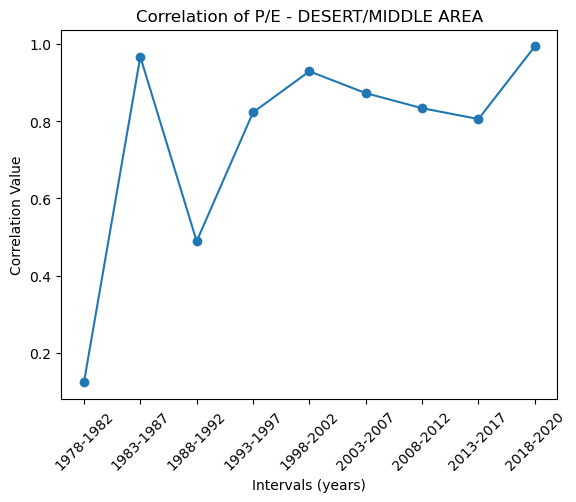

In [59]:
using PyPlot

# Assuming you already have the 'a', 'b', and 'norm_values' variables defined

# Create a vector of labels for the legend
legend_labels = ["1978-1982","1983-1987","1988-1992","1993-1997","1998-2002","2003-2007","2008-2012","2013-2017","2018-2020"]


plot(0:8, correlation_values,"o-")  # Use the color you prefer for the scatter points
xticks(0:8, ["1978-1982","1983-1987","1988-1992","1993-1997","1998-2002","2003-2007","2008-2012","2013-2017","2018-2020"],rotation=45)

xlabel("Intervals (years)")
ylabel("Correlation Value")
title("Correlation of P/E - DESERT/MIDDLE AREA")

# Display the plot
show()



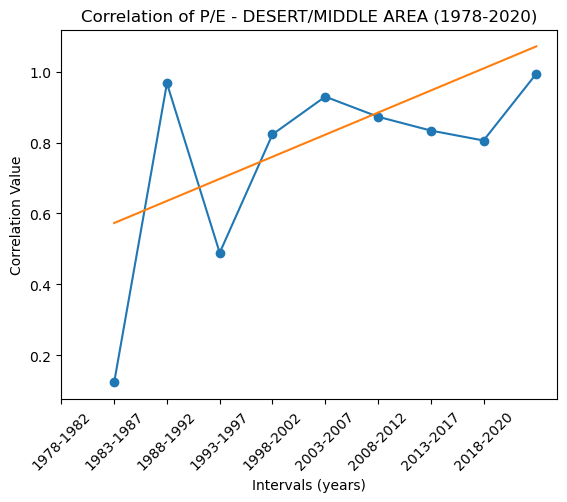

In [70]:
using Polynomials #minimise the error 
f=fit(0:8, correlation_values, 1) #the number before x is the variation per year of T
b=f[0]; a=f[1]; #parameters, a=SLOPE
yy=1:9
trend=yy*a .+ b
figure()
plot(yy, correlation_values,"o-",yy,trend)  # Use the color you prefer for the scatter points
xticks(0:8, ["1978-1982","1983-1987","1988-1992","1993-1997","1998-2002","2003-2007","2008-2012","2013-2017","2018-2020"],rotation=45)
xlabel("Intervals (years)")
ylabel("Correlation Value")
title("Correlation of P/E - DESERT/MIDDLE AREA (1978-2020)")
savefig("output_plot.png")


# Display the plot



In [71]:
using Random
x=yy

using Polynomials, Random
function shufflingfit(x, y,a; n=1000)  
  s=zeros(n,1)
  for i=1:n
    f=fit(x,shuffle(y),1)
    s[i]=f[1]
  end
  count = sum(abs.(s).>abs.(a))
  return (count/n) #count/n=count percentage
end
y=trend
(p) = shufflingfit(x,y,a, n=10000) #if p>0.05 the trend is not significant
p,a


(0.0, 0.06225900558249794)